Perform a linear regression based price prediction, using a 'Real estate' dataset

#### Dataset

In this example, we will be using the “Real estate price prediction” dataset

- Transaction date (purchase)
- House age
- Distance to the nearest MRT station (metric not defined)
- Amount of convenience stores
- Location (latitude and longitude)
- House price of unit area

Problem statement: Predict the house price of unit area based on various features provided such as house age, location, etc.

#### Importing all the required libraries

In [ ]:
# Importing Standard Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sklearn Libraries
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Importing the dataset

In [ ]:
# Downloaded housing data set
# Convert it into a pandas dataframe:

df = pd.read_csv('Real_estate.csv')

# Taking only the selected two attributes from the dataset
df_binary = df[['X2 house age', 'Y house price of unit area']]

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Dropping non-useful columns

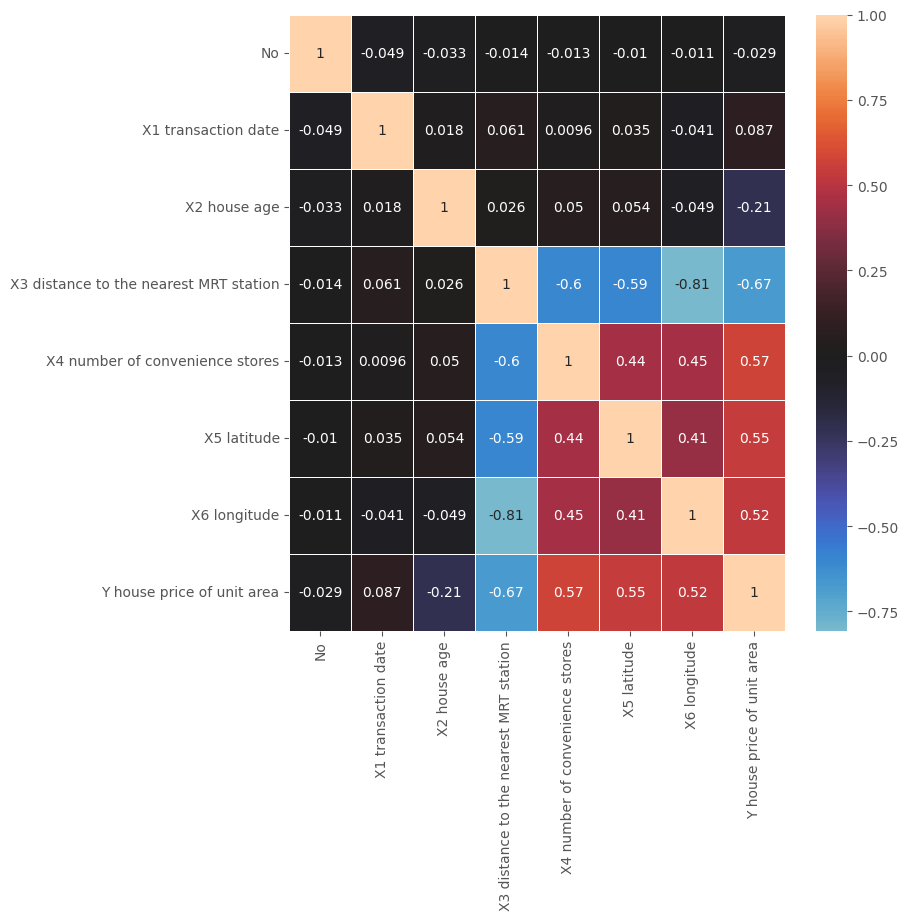

In [ ]:
#dropping columns
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, center=0)
plt.show()
# YOUR CODE HERE

In [ ]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [ ]:
# Separating the data into independent and dependent variables
# Pridiction features
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude' ]]
# Target feature
Y = df['Y house price of unit area']
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


#### Finding if there are any null values

In [ ]:
# YOUR CODE HERE
X.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

#### Exploring the data scatter

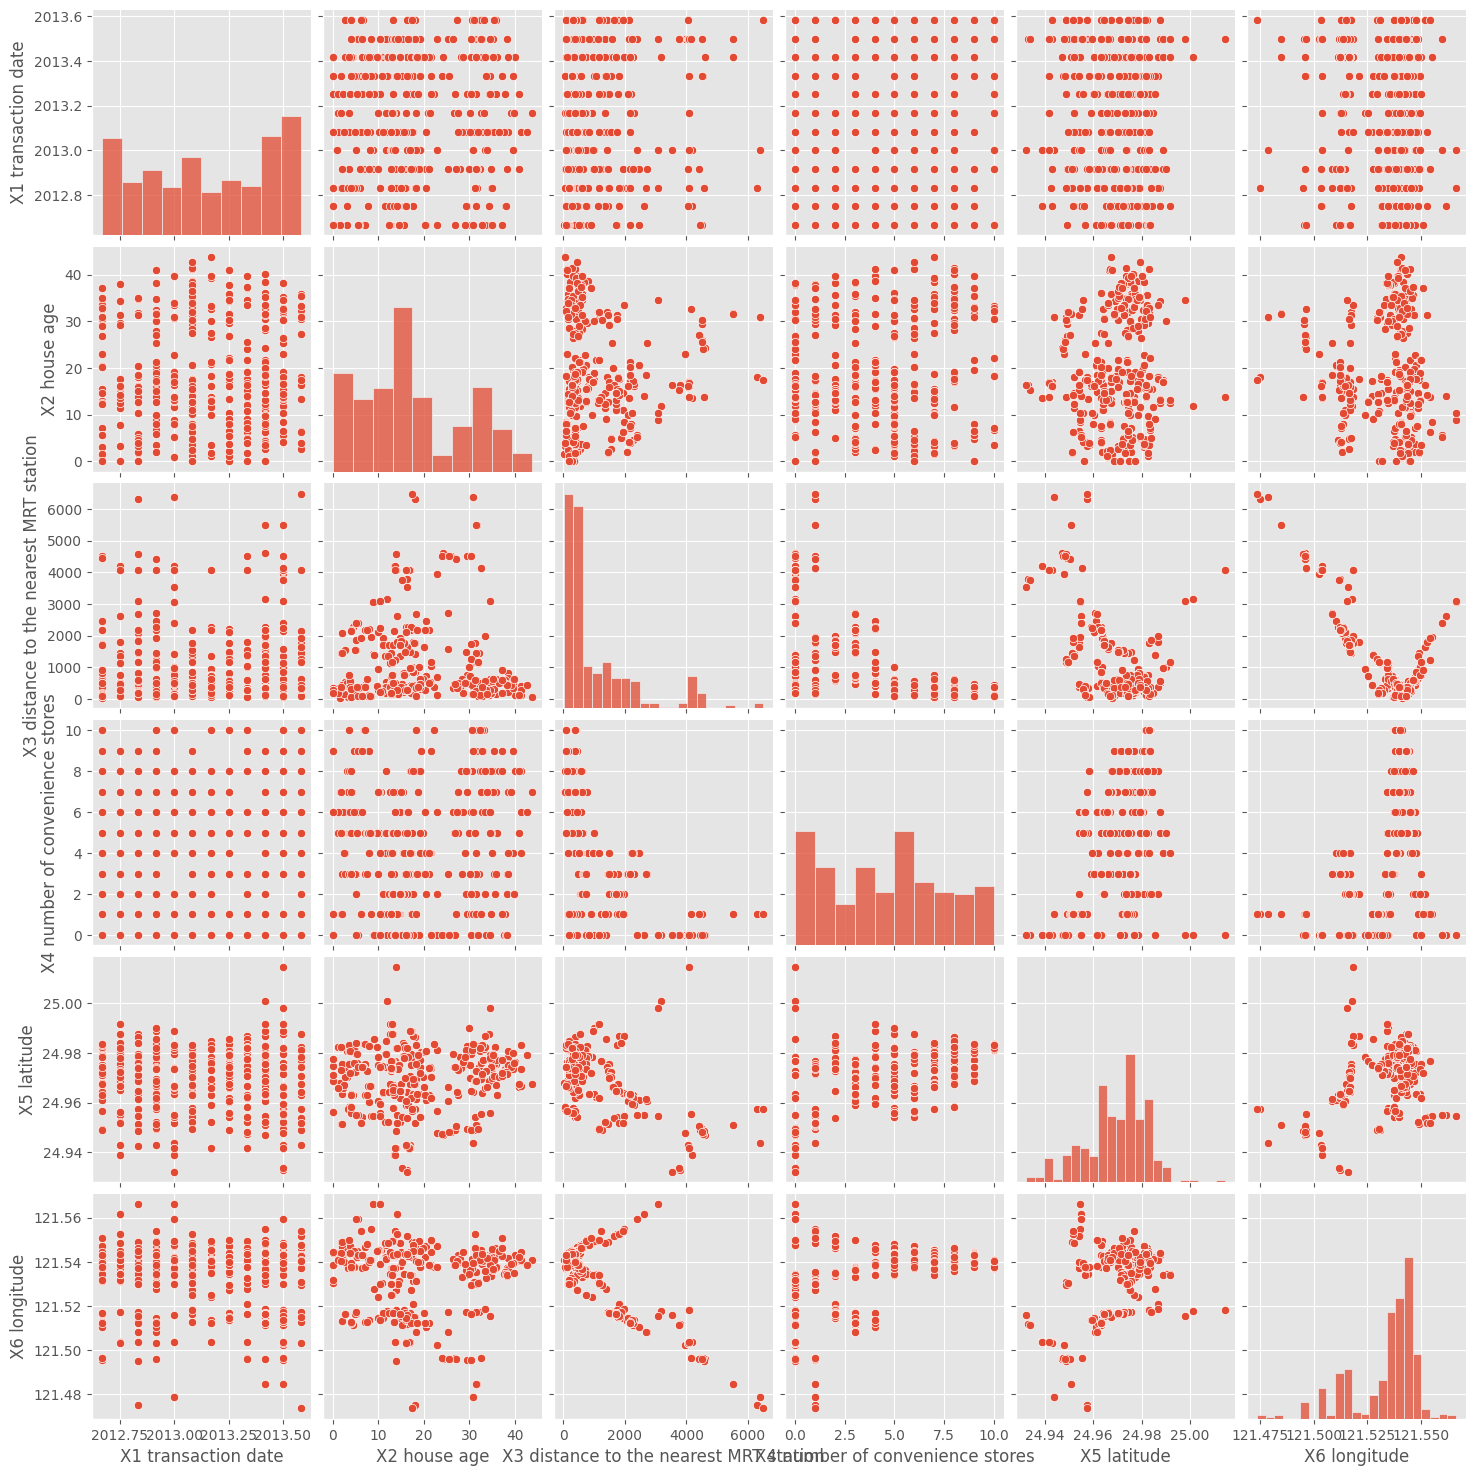

In [ ]:
# Pairplot
plt.style.use('ggplot')
sns.pairplot(X)

#### Training our model

Splitting the data into training and testing data

In [ ]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.33, random_state= 101)

#### Training the Linear Regression model on the Training set

In [ ]:
# Instantiating LinearRegression() Model
lr = LinearRegression()

Training/Fitting the Model

In [ ]:
# Training/Fitting the Model
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making Predictions
pred = lr.predict(X_test)

In [ ]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))
print('Coefficient of Determination:', r2_score(y_test, pred))

Mean Absolute Error: 5.367638633224113
Mean Squared Error: 46.46581372087127
Mean Root Squared Error: 6.816583728002706
Coefficient of Determination: 0.6611102840968465


In [ ]:
pred = lr.predict(X_test)
print('Predicted House price per unit area:', pred[2])
print('Actual House price per unit area:', y_test.values[2])

Predicted House price per unit area: 22.34980789543988
Actual House price per unit area: 24.7
